In [112]:
from cleanning_data import cleanning_data
from datetime import datetime

frame = cleanning_data.df


for fecha in frame.fecha_entrega:
    frame["fecha_entregasmpt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_ultima:
    frame["fecha_ultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_penultima:
    frame["fecha_penultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_antepenultima:
    frame["fecha_antepenultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
     
#print(frame[["fecha_entregasmpt", "fecha_ultimampt", "fecha_penultimampt", "fecha_antepenultimampt"]])
frame.info()


In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
import pandas as pd

frame 
ct = ColumnTransformer(
    [
        ("scale", StandardScaler(), make_column_selector(dtype_include=np.int64)),
        ("scale2", StandardScaler(), make_column_selector(dtype_include=np.float64))
    ],
    remainder="drop"
)
ct.fit_transform(frame)

data_frame_scalado = pd.DataFrame(ct.fit_transform(frame), columns=ct.get_feature_names_out())

data_frame_scalado

,scale__id,scale__kms_ultima,scale__kms_penultima,scale__kms_antepenultima,scale__dias_para_5000,scale__dias_para_5000_binario,scale2__fecha_entregasmpt,scale2__fecha_ultimampt,scale2__fecha_penultimampt,scale2__fecha_antepenultimampt
0,-1.352831,0.002502,0.020338,-0.012636,1.615983,0.0,0.0,0.0,0.0,0.0
1,-1.352776,0.000575,0.018496,-0.012636,0.843425,0.0,0.0,0.0,0.0,0.0
2,-1.352721,0.004735,-0.016538,-0.012636,0.655506,0.0,0.0,0.0,0.0,0.0
3,-1.352667,0.014599,-0.016538,-0.012636,1.198384,0.0,0.0,0.0,0.0,0.0
4,-1.352612,-0.019299,-0.016537,-0.012636,-1.161049,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
231385,-0.712171,-0.004694,0.001449,-0.000658,0.008228,0.0,0.0,0.0,0.0,0.0
231386,-0.712116,-0.017455,-0.013406,-0.011034,0.759905,0.0,0.0,0.0,0.0,0.0
231387,-0.712061,0.009648,-0.016538,-0.012636,1.428063,0.0,0.0,0.0,0.0,0.0
231388,-0.712007,-0.014312,-0.007533,-0.007475,-0.659931,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = data_frame_scalado[["scale2__fecha_entregasmpt", "scale2__fecha_ultimampt", "scale2__fecha_penultimampt", "scale2__fecha_antepenultimampt", "scale__kms_ultima", "scale__kms_penultima", "scale__kms_antepenultima"]]
y = frame["dias_para_5000"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train

67772    1
16079    1
8139     1
1698     1
49938    1
        ..
33433    1
10771    1
21172    1
44822    1
11204    1
Name: dias_para_5000_binario, Length: 161973, dtype: int64

In [ ]:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(
    # --------------------------------------------------------------------------
    # Specify the norm of the penalty:
    # * None: no penalty is added.
    # * 'l2': add a L2 penalty term and it is the default choice.
    # * 'l1': add a L1 penalty term.
    # * 'elasticnet': both L1 and L2 penalty terms are added.
    penalty=None,
    # --------------------------------------------------------------------------
    # Constant that multiplies the regularization term if regularization is
    # used.
    alpha=1,
    # --------------------------------------------------------------------------
    # The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0
    # corresponds to L2 penalty, l1_ratio=1 to L1. Only used if
    # penalty='elasticnet'.
    l1_ratio=0.1,
    # --------------------------------------------------------------------------
    # Whether the intercept should be estimated or not. If False, the data is
    # assumed to be already centered.
    fit_intercept=True,
    # --------------------------------------------------------------------------
    # The maximum number of passes over the training data (aka epochs). It only
    # impacts the behavior in the fit method, and not the partial_fit method.
    max_iter=10000,
    # --------------------------------------------------------------------------
    # The stopping criterion. If it is not None, the iterations will stop when
    # (loss > previous_loss - tol).
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Whether or not the training data should be shuffled after each epoch.
    shuffle=True,
    # --------------------------------------------------------------------------
    # Constant by which the updates are multiplied.
    eta0=3,
    # --------------------------------------------------------------------------
    # Used to shuffle the training data, when shuffle is set to True. Pass an
    # int for reproducible output across multiple function calls.
    random_state=1,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation. score
    # is not improving. If set to True, it will automatically set aside a
    # stratified fraction of training data as validation and terminate training
    # when validation score is not improving by at least tol for
    # n_iter_no_change consecutive epochs.
    early_stopping=True,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.99,
    # --------------------------------------------------------------------------
    # Number of iterations with no improvement to wait before early stopping.
    n_iter_no_change=10,
    # --------------------------------------------------------------------------
    # Weights associated with classes. If not given, all classes are supposed to
    # have weight one. The “balanced” mode uses the values of y to automatically
    # adjust weights inversely proportional to class frequencies in the input
    # data as n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
)

perceptron.fit(x_test, y_test)

y_pred = perceptron.predict(x_train)

perceptron.score(x_train, y_train)


ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
confusion_matrix(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_train,
    # -------------------------------------------------------------------------
    # Estimated targets as returned by a classifier.
    y_pred=y_pred,
    # -------------------------------------------------------------------------
    # List of labels to index the matrix.
    labels=None,
    # -------------------------------------------------------------------------
    # Normalizes confusion matrix over the true (rows), predicted (columns)
    # conditions or all the population.
    # 'true', 'pred', 'all'
    normalize=None,
)
)


,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


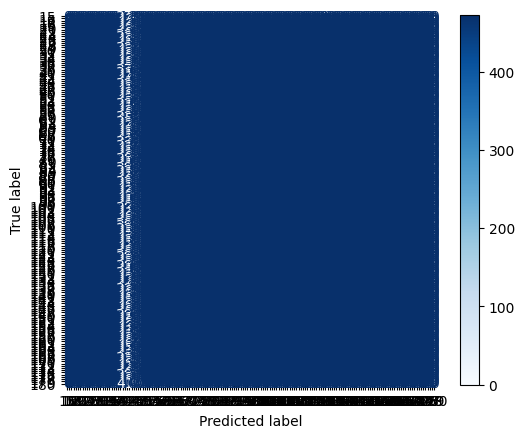

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
    perceptron,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

print(disp.confusion_matrix)

plt.show()